# Factors Affecting Bikeshare Trip Duration


#### Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for one month; starting from February 1 and end on March 1 of  year 2019. <br>
This dataset is taken from  https://www.fordgobike.com/system-data  <br>

#### Dataset Features
> It consists of 183412 resords and it has 16 features, the most important of which is: information about trips taken by service's members, users types, users age and gender, stations of starting and ending trips, duration of trips and so on.

In [91]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

In [92]:
#reading the data into a dataframe
df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [93]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.8,-122.4,13.0,Commercial St at Montgomery St,37.8,-122.4,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.8,-122.4,81.0,Berry St at 4th St,37.8,-122.4,2535,Customer,nan,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.8,-122.4,3.0,Powell St BART Station (Market St at 4th St),37.8,-122.4,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.8,-122.4,70.0,Central Ave at Fell St,37.8,-122.4,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.8,-122.3,222.0,10th Ave at E 15th St,37.8,-122.2,4898,Subscriber,1974.0,Male,Yes


In [94]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.8,-122.4,324.0,Union Square (Powell St at Post St),37.8,-122.4,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.8,-122.4,66.0,3rd St at Townsend St,37.8,-122.4,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.3,-121.9,277.0,Morrison Ave at Julian St,37.3,-121.9,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.8,-122.3,216.0,San Pablo Ave at 27th St,37.8,-122.3,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.8,-122.4,37.0,2nd St at Folsom St,37.8,-122.4,1057,Subscriber,1989.0,Male,No


In [95]:
#getting to know information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [96]:
#checking for duplicates
df.duplicated().sum()

0

In [97]:
#checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [98]:
#since start_station_name and end_station_name, member_birth_year and member_gender are important in the analysis, 
#null values need to be dropped
df1=df.copy()
#dropping null values
df1=df1.dropna()
#resetting The index
df1=df1.reset_index(drop=True)

In [99]:
#converting start_time and end_time to datetime  
df1.start_time=pd.to_datetime(df1.start_time)
df1.end_time=pd.to_datetime(df1.end_time)

#converting member_birth_year to int
df1.member_birth_year=df1.member_birth_year.astype(int)


In [100]:
#displaying only until one floating point
pd.options.display.float_format='{:0.1f}'.format

### What is the structure of your dataset?

> This dataset consists of 183412 resords and it has 16 features, the most important of which is: information about trips taken by service's members, users types, users' age and gender, stations of starting and ending trips, duration of trips and so on.
### What is/are the main feature(s) of interest in your dataset?

> How long does the average trip
  take?<br>
  When are most trips taken in terms
  of time of day? <br>
  Does the above depend on if a user
  is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, gender, member_birth_year 

## Univariate Exploration
In this part, individual variables are being investigated to check how they are distributed 

In [101]:
#getting to know duration statistics
df1.describe()["duration_sec"]

count   174952.0
mean       704.0
std       1642.2
min         61.0
25%        323.0
50%        510.0
75%        789.0
max      84548.0
Name: duration_sec, dtype: float64

The standard deviation has a value of 1642 which is much larger than the mean. This shows a high variablility in the data

**Plotting the [duration_sec] column**

#### Distribution of Duration(sec)
The histogram shows that the data is highly skewed to the right so a log scale is used to further explore the duration data


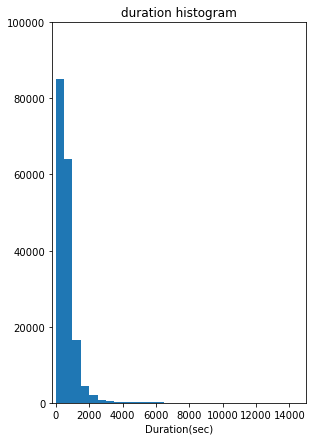

In [102]:
#plotting a histogram
plt.figure(figsize=[10,7])
plt.subplot(1,2,1);
bins=np.arange(0,df1['duration_sec'].max()+500,500)
plt.hist(data=df1,x="duration_sec",bins=bins);
plt.xlabel("Duration(sec)");
plt.title("duration histogram")
plt.xlim(-200, 15000);
plt.ylim(0,100000);

Using a log scale to further explore the duration data

In [103]:
# Transform the describe() to a scale of log10
np.log10(df1['duration_sec'].describe())

count   5.2
mean    2.8
std     3.2
min     1.8
25%     2.5
50%     2.7
75%     2.9
max     4.9
Name: duration_sec, dtype: float64

**Plotting the duration on a logscale produces a histogram that looks roughly unimodal. Most of the data points appear to be less than 1000 seconds. The peak is at about 500 seconds and the average duration is 700 seconds**

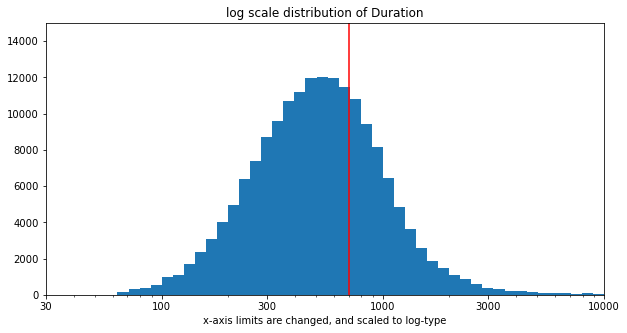

In [104]:
# Bin size
plt.figure(figsize=[10,5])
bins = 10 ** np.arange(1.8, 5+0.05, 0.05)

ticks = [30, 100, 300, 1000,3000,10000]
# Converting ticks into strings
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df1, x='duration_sec', bins=bins);

#converting to log scale
plt.xscale('log')
plt.title("log scale distribution of Duration")
plt.xlabel('x-axis limits are changed, and scaled to log-type');
plt.axvline(x=df1.duration_sec.mean(),color="r");
plt.xlim(50,10000);
plt.ylim(0,15000);

#apply xticks
plt.xticks(ticks, labels);

**Plotting Univariate Categorical Data**

**Which gender is dominant as bikeshare riders?**

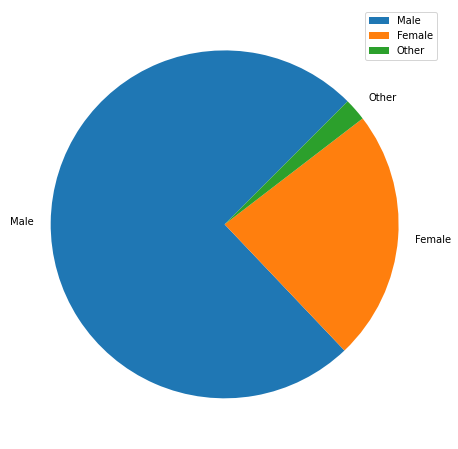

In [105]:


plt.figure(figsize=(10,8))
plt.pie(df1['member_gender'].value_counts(),startangle=45,labels=['Male','Female','Other']);
plt.legend();

Males are dominant as bikeshare riders

In [106]:
color=sb.color_palette()[0]

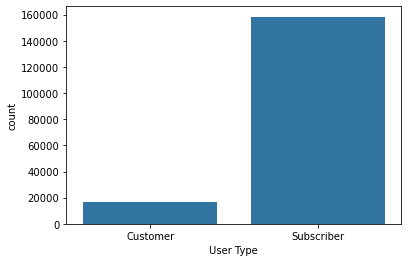

In [107]:
#plotting types of users
sb.countplot(data=df1, x="user_type", color=color);
plt.xlabel("User Type");

But, How about ages of bikeshare riders?

In [108]:
#Creating age column as it makes it easier for analysis
df1=df1.reset_index(drop=True)
df1["age"]=df1["member_birth_year"].apply(lambda x:2019-x)

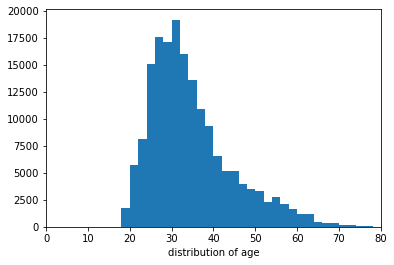

In [109]:
#first, plotting the distribution of age
bins=np.arange(0, df1.age.max()+2,2);
plt.hist(data=df1, x="age",bins=bins);
plt.xlim(0,80);
plt.xlabel("distribution of age");

The plot is right skewed which is expected with age. from the plot , the highest values are in thirties 

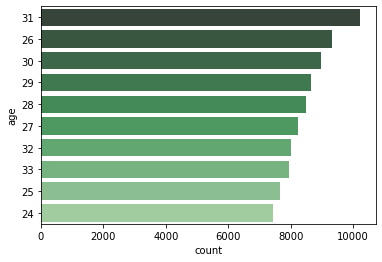

In [110]:
#creating the plot for top ages of bikeshare riders
sb.countplot(data=df1, y="age", palette="Greens_d", order=df1.age.value_counts().iloc[:10].index);


**As shown in the plot, birth dates of top bikeshare riders are between 24 and 33 years old**

**And, What about the most common start and end stations?**

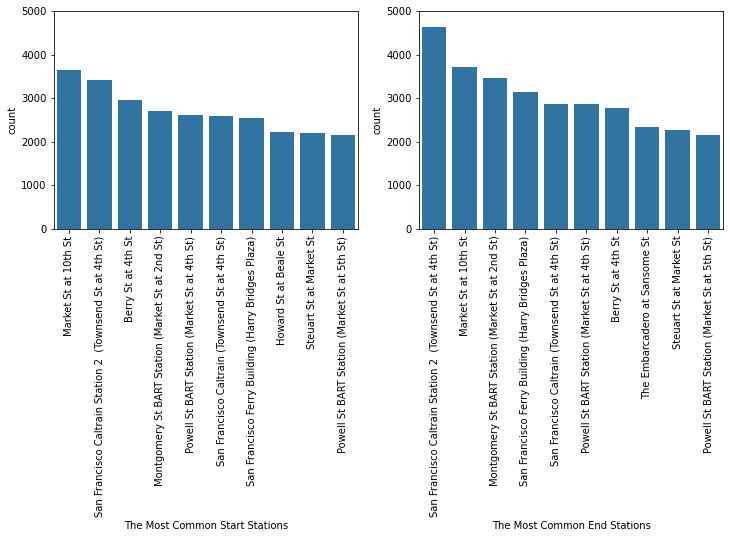

In [111]:
plt.figure(figsize=[12,4]);
#plotting start stations
plt.subplot(1,2,1)
sb.countplot(data=df1, x='start_station_name', color=color , order=df1.start_station_name.value_counts().iloc[:10].index);
plt.xlabel("The Most Common Start Stations")
plt.xticks(rotation=90);
plt.ylim(0,5000);

#plotting end stations
plt.subplot(1,2,2)
sb.countplot(data=df1, x='end_station_name', color=color , order=df1.end_station_name.value_counts().iloc[:10].index);
plt.xlabel("The Most Common End Stations")
plt.xticks(rotation=90);
plt.ylim(0,5000);



The plot shows, that there are some start stations that are commonly used as end stations; Market St and San Fransisco Catrain Station 2 are the most common  as both start and end stations

What is the day of the week with the largest number of rides?

In [112]:
#tweaking date_time to make some analysis on week and hour 

#Getting to convert day number to weekday name 
# source: https://stackoverflow.com/questions/29096381/num-day-to-name-day-with-pandas

df1['weekday'] = df1[['start_time']].apply(lambda x: dt.datetime.strftime(x['start_time'], '%A'), axis=1)

#extracting hour
df1["hour"]=df1.start_time.dt.hour





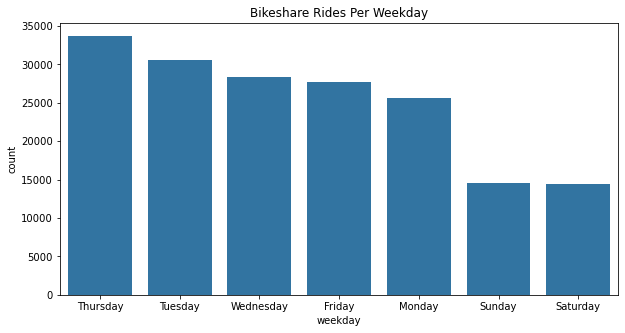

In [113]:
#plotting the most busy weekdays in terms of bikeshare riding
plt.figure(figsize=[10,5]);
order=df1.weekday.value_counts().index
plt.title("Bikeshare Rides Per Weekday")

sb.countplot(data=df1, x="weekday", color=color, order=order);

The lowest number of rides occured in Sundays and Saturdays maybe because they are weekend and the highest number of rides occured in Thursday

Let's further check in which time of Thursday  bikeshare rides are the most

In [114]:
#filtering the dataset for Thursday
day=df1.query('weekday=="Thursday"')
day = day.reset_index(drop=True)


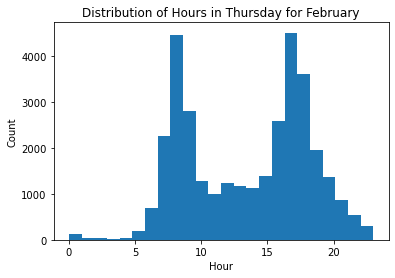

In [115]:
#plotting the distribution of hours in Thursday
plt.hist(data=day, x='hour',bins=24);
plt.xlabel("Hour");
plt.ylabel("Count");
plt.title("Distribution of Hours in Thursday for February");

The distribution is bimodal with the highest counts of 8 and 17 o'clock

## Bivariate Exploration

In this section, relationships between pairs of variables in the data are investigated.

**Plotting Age Against trip duration**

### Age and Trip Duration
In plotting age against trip duration, it's shown that most riders age is between 20 and 60 years old and duration is less than 7000 seconds, or around 116 minutes

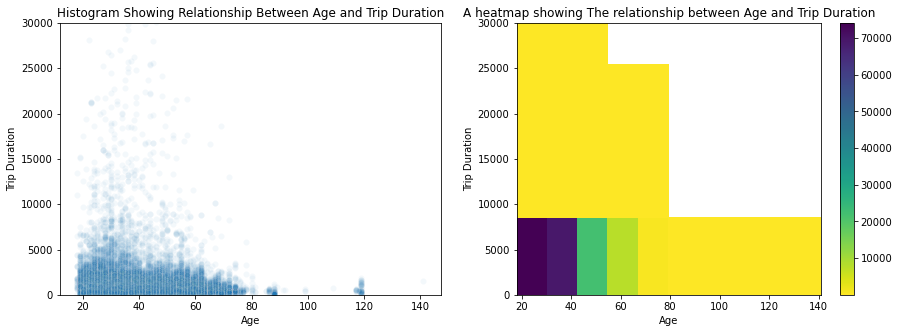

In [116]:
#using scatter plot
plt.figure(figsize=[15,5]);
plt.subplot(1,2,1);
sb.scatterplot(data=df1, x="age", y="duration_sec", alpha=1/20);
plt.title("Histogram Showing Relationship Between Age and Trip Duration");
plt.ylabel("duration_sec")
plt.xlabel("Age")
plt.ylabel("Trip Duration")
plt.ylim(0,30000);

#plotting a heatmap
plt.subplot(1,2,2);
plt.hist2d(data = df1, x = 'age', y = 'duration_sec', cmin=0.5, cmap='viridis_r')
plt.title("A heatmap showing The relationship between Age and Trip Duration" )
plt.ylim(0,30000);
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Trip Duration');

The relation between weekday and duration

### Weekdays and Trip Duration
Saturdays and Sundays tend to have higher trip duration.

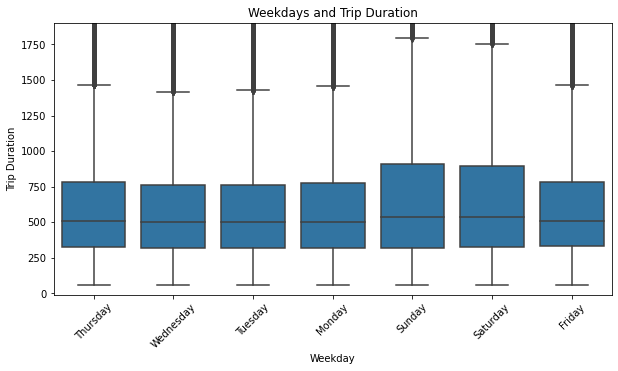

In [117]:
#boxPlot

plt.figure(figsize=[10,5])
sb.boxplot(data=df1, x="weekday", y="duration_sec", color=color)
plt.xticks(rotation=45);
plt.title("Weekdays and Trip Duration");
plt.xlabel("Weekday");
plt.ylabel("Trip Duration")
plt.ylim(-10,1900);


The Relatioship between Gender and Trip Duration

### Genders and Trip Duration
"Other" gender types have the largest average trip duration followed by females followed by males. This is interesting as male riders surpass females and other riders

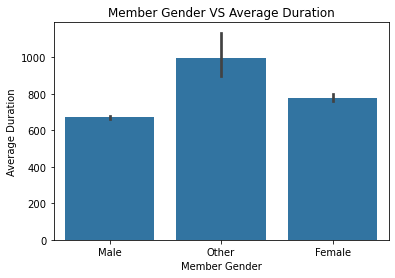

In [118]:
sb.barplot(data = df1,x="member_gender", y="duration_sec",color=color);
plt.xlabel("Member Gender");
plt.ylabel("Average Duration");
plt.title("Member Gender VS Average Duration");

User Types and Trip Duration

 ## User Types
 By comparing trip duration for different user types, we find that customers tend to take longer trips than subscribers

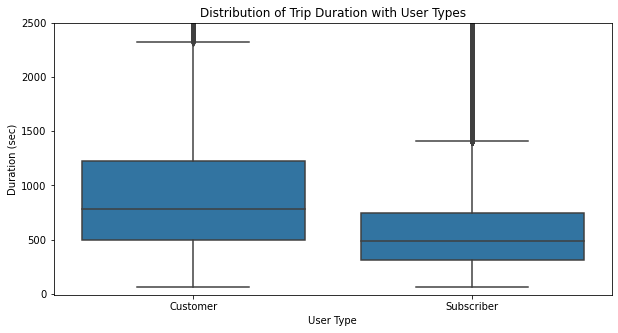

In [119]:

#User Types and Trip Duration
plt.figure(figsize = [10, 5])
sb.boxplot(data = df1, x = 'user_type', y = 'duration_sec', color = color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title("Distribution of Trip Duration with User Types");


User Types for the top start stations

In [120]:
#getting to know the top ten used start stations
freq_stations= df1.start_station_name.value_counts()[:10].index.values

In [121]:
#creating a Dataframe that includes the top ten used start station
t=df1.loc[df1.start_station_name.isin(freq_stations)]



Text(0.5, 1.0, 'User Types For The Most Common Start Stations')

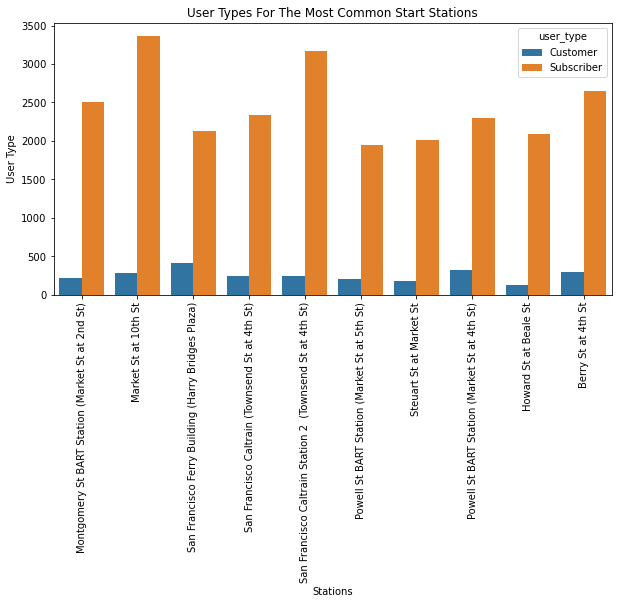

In [122]:
#creating a countplot to depict the relationship between top start stations and different user types
plt.figure(figsize=[10,5]);
sb.countplot(data=t, x='start_station_name', hue="user_type");
plt.xticks(rotation=90);
plt.xlabel("Stations")
plt.ylabel("User Type")
plt.title("User Types For The Most Common Start Stations")

The plot shows that the subscriber user type is dominant across the top used start stations

Investigating the busy hours for the three busiest days in bikeshare rides

In [134]:
#filtering the dataset for busiest days
busy=df1.loc[df1['weekday'].isin(["Thursday","Wednesday","Tuesday"])]
busy = busy.reset_index(drop=True)


<Figure size 720x720 with 0 Axes>

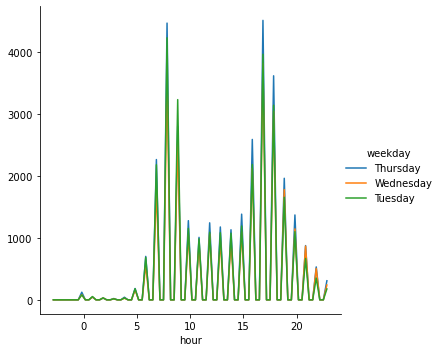

In [135]:

#plotting a lineplot 
plt.figure(figsize=[10,10])
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs);

bin_edges = np.arange(-3, df1['hour'].max()+1/3, 1/3)
g = sb.FacetGrid(data = busy, hue = 'weekday', height = 5)
g.map(freq_poly, "hour", bins = bin_edges)
g.add_legend()


The busiest hours in the busiest weekdays tend to be around 7-9 o'clock and  16-18 o'clock, maybe because they are rush hours in  business days

## Multivariate Exploration


Age Against Duration for different Genders

###  Age Against Duration for different Genders
By plotting age against duration for different gender types, it's found out that users of "Other' gender who are in their twenties have the largest mean trip duration. And surprisingly the second highest trip duration is by people in their fifties 

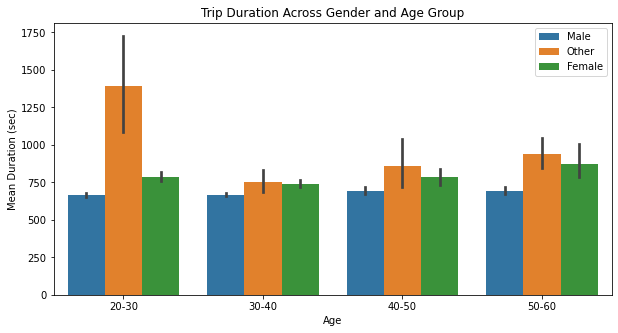

In [136]:
#first, filtering data for ages between 20 and 60 
ages=df1.query('(age >= 20)|(age < 60)')

#creating bins for the data
ages['bin'] = pd.cut(ages['age'], bins=range(20,61,10), labels=[f'{l}-{l+10}' for l in range(20,51,10)])
#source: https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python


plt.figure(figsize = [10, 5])

ax = sb.barplot(data=ages, x='bin', y = 'duration_sec', hue='member_gender')
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Duration (sec)')
leg = ax.legend()


## Mean Trip Duration for Different User Types Across The Week
On average, customers take longer trip durations than Subscribers, especially on Saturday and Sunday 

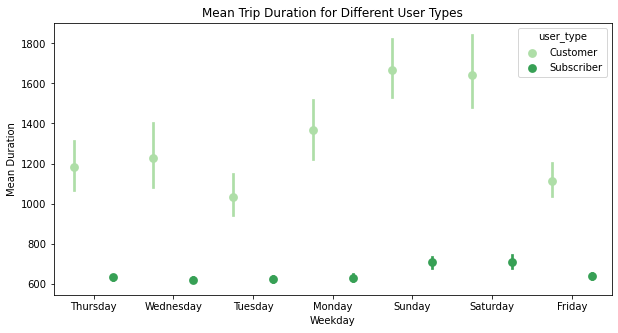

In [137]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = df1, x = 'weekday', y = 'duration_sec', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.5)
plt.title('Mean Trip Duration for Different User Types')
plt.xlabel("Weekday")
plt.ylabel("Mean Duration")
plt.show();

## Mean Duration Against The Start Time
Longer durations occured for trips started at 12 or 2 or 3 AM and were majorly by "Other" gender

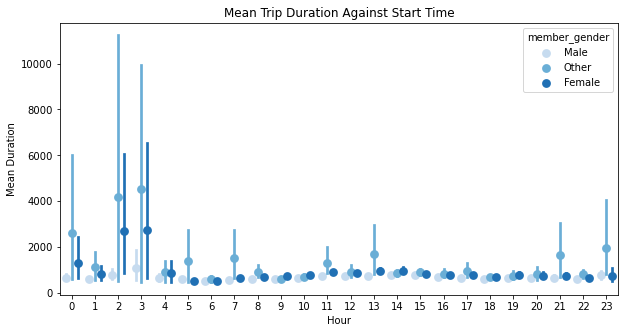

In [138]:
fig = plt.figure(figsize = [10,5])
sb.pointplot(data = df1, x = 'hour', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.title('Mean Trip Duration Against Start Time')
plt.xlabel("Hour");
plt.ylabel("Mean Duration");
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The trip duration is higher for people in their twenties and "Other" gender has the highest trip duration in all age ranges. followed by women.
- longer trip durations started at 12, 2 or 3 am, maybe due to certain activities.
- San Salvador St at 9th St, and China Basin St at 3rd St were the most frequenst stations with long trip durations

### Were there any interesting or surprising interactions between features?

The second highest trip duration is by people in their 50s, it's interesting but it may be because of thier old age